In [55]:
import json
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.polynomial.polynomial import polyfit

In [2]:
NUM_ITERS = 64

In [3]:
poly_correct = np.array(
    [-100330, 65070, 9596, 57850, 35652, 105533, -12476, -46863, -37129, -56173, -21068, 2324, 115540, 44633, 125101, 3586, 69993, -81687, -64128, 120572, 2307, 130526, 4041, -41650, 84699, -8418, 74822, 109619, -91410, -91558, 115894, 23794, 38581, 97367, -68344, 13693, -29260, -93738, 25493, 28466, -98993, -35421, -129186, -35972, -98782, 5229, 121668, -36138, 43042, 126578, -51112, -26829, 88126, -48827, -6483, 91640, 26814, 122947, 26573, 69248, 24721, -59507, 95958, 40139, -14569, 50396, -112991, -68730, 66400, -78235, -86549, -76860, 64682, -31281, -67048, -120548, -94141, -16141, -41256, -107494, 123510, 92927, -46082, -106954, 123712, -54074, -68055, -27761, 95540, -34279, 88614, -16752, -106508, 110918, -79361, -111904, -61989, -37948, -98516, -55493, 39202, -40934, -32598, 76273, 51232, -41914, 65442, -16213, 55769, 94113, 50226, 120092, -128689, -94408, -61484, -19585, -88952, -76813, 2824, 91206, -56337, -118806, -96835, 15049, 128028, 59495, -17594, -36106, 17150, 47484, 87598, -26352, -53032, -77067, -39068, 40578, 11118, -28570, 75283, -34653, -5989, 63604, -62640, 129983, 82192, -4490, 12561, -25277, -66376, -122930, 59076, -108514, 45386, -3452, -26574, 77009, 107691, 130619, 83009, -15992, 67954, -115355, 51392, 109151, 14436, 87167, 98658, 26737, -40221, -51762, 14194, -41174, 57083, 83262, -28556, -118523, -21025, 102215, -112607, 13209, 29419, 91941, -11896, 90350, 8775, 28083, -2437, -100647, 57982, -82079, 43127, -121490, 55338, -76765, -88055, 57275, 82896, 45758, 115959, 83102, 20486, 108583, 130356, 8121, 24164, 33415, 127913, -66700, 126187, -94234, -129363, 19066, 49679, -42788, -37787, 76823, 87773, -78390, -93583, 34618, 10559, 16455, 20048, -108818, 22738, -81005, -38836, 96902, 123986, -110533, 123344, -60505, -107167, 60008, 122648, 63987, -41240, -90385, -36204, 125741, 89346, -67624, 85577, -51871, -75793, 35865, 84258, -26867, -21851, -32105, -7085, -34076, -79382, 103232, -3429, 17899],
    dtype=np.int32
)

In [4]:
def is_perfect_glitch(faulted_poly: np.ndarray, correct_poly: np.ndarray = poly_correct, coeffs_per_iter: int = 4) -> bool:
    # zero good iters would be total trash (probably) and 64 good iters would be no glitch
    for i in range(1, 63 + 1):
        # index of the first zero coefficient due to a fault
        split_index = i * coeffs_per_iter
        
        same_as_expected = np.all(faulted_poly[:split_index] == correct_poly[:split_index])
        rest_faulted = np.all(faulted_poly[split_index:] == 0)
        
        if same_as_expected and rest_faulted:
            return i
    return None

In [5]:
def get_iter(poly_candidate: np.ndarray, poly_correct: np.ndarray = poly_correct, coeffs_per_iter: int = 4, beta: int = None) -> bool:
    """
    0 = all coeffs zero; 1 - 63 = some non faulted in the beginning rest zero;
    64 = no fault; None = not our fault model (i.e. faults within iters)
    """
    is_same = poly_candidate == poly_correct
    if beta is None:
        is_zero = poly_candidate == 0
    else:
        is_zero = np.abs(poly_candidate) <= beta
    for i in range(0, NUM_ITERS + 1):
        # index of the first zero coefficient due to a fault
        split_index = i * coeffs_per_iter
        
        same_as_expected = np.all(is_same[:split_index])
        if not same_as_expected:
            return None
        rest_faulted = np.all(is_zero[split_index:])
        
        if same_as_expected and rest_faulted:
            return i
    return None
assert get_iter(np.concatenate((poly_correct[:40], np.zeros(256 - 40)))) == 10
assert get_iter(np.concatenate((poly_correct[:3], np.zeros(256 - 3)))) is None
assert get_iter(poly_correct) == NUM_ITERS

In [6]:
files_all = [
    '77param52e114dd-1fc9-4569-a346-ea3060d9f46d.json',
    '77param6798f8cc-b9ed-4545-9d30-8d0ea2e28ac6.json',
    'poly_more_offsets_around_the_offsetmorewidthe1bfd82a-e3c8-466e-a5fb-e33e073c5e07.json',
    'poly_more_offsets_around_the_offsetmorewidth6a4e21cc-2aa7-49e5-849a-9486cf6ff91d.json',
    'poly_more_offsets_around_the_offsetba12fb8c-ea18-4d12-b70e-b2246460387a.json',
    'poly_otherparam_128_result36916591-50f6-4670-81ee-0a018b58f284.json',
    'poly_second_fixed_result90889173-bab7-499f-9817-579068697dd7.json',
    'poly_second_result0a4aae14-b91e-4bad-a2e1-50c2524b2176.json',
    'poly_second_result0a4aae14-b91e-4bad-a2e1-50c2524b2176.json',
    'poly_first_result1e99bf50-1570-4d94-8fdd-a638ad071e37.json',
]
files_selected = files_all[:4] # only the last are compatible with our new polynomial
file_selected = files_all[0]
files_selected

['77param52e114dd-1fc9-4569-a346-ea3060d9f46d.json',
 '77param6798f8cc-b9ed-4545-9d30-8d0ea2e28ac6.json',
 'poly_more_offsets_around_the_offsetmorewidthe1bfd82a-e3c8-466e-a5fb-e33e073c5e07.json',
 'poly_more_offsets_around_the_offsetmorewidth6a4e21cc-2aa7-49e5-849a-9486cf6ff91d.json']

In [7]:
data_points = []
for file in files_selected:
    with open(file) as f:
        file_content = json.load(f)
        for i in range(len(file_content['faulted_polys'])):
            poly_numpy = np.array(file_content['faulted_polys'][i], dtype=np.int32)
            data_points.append({
                'faulted_poly': poly_numpy,
                'params': tuple(file_content['faulted_polys_params'][i]),
                'iteration': is_perfect_glitch(poly_numpy)
            })
len(data_points), "0 = ext_offset, 1 = offset, 2 = width"

(39861, '0 = ext_offset, 1 = offset, 2 = width')

In [8]:
data_perfect = []
num_perfect = defaultdict(lambda: 0)
num_not_perfect = defaultdict(lambda: 0)
for point in data_points:
    if point['iteration'] is not None:
        num_perfect[point['params']] += 1
        data_perfect.append(point)
    else:
        num_not_perfect[point['params']] += 1
for p in data_perfect:
    total = num_not_perfect[p['params']] + num_perfect[p['params']]
    p['total'] = total
    if num_not_perfect[p['params']] == 0:
        p['success_rate'] = 1
        continue
    good = num_perfect[p['params']]
    p['success_rate'] = good / total
len(data_perfect)

2333

In [9]:
all_discovered_iterations = set()
for point in data_perfect:
    all_discovered_iterations.update(set([point['iteration']]))
all_discovered_iterations

{1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 48,
 49,
 51,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 61,
 62,
 63}

In [10]:
data_perfect = list(filter(lambda p: p['total'] > 1, data_perfect))

In [120]:
def make_plot(dat, text: bool = False, lstsq: bool = False):
    iters = list(map(lambda p: p['iteration'], dat))
    ext_offsets = list(map(lambda p: p['params'][0], dat))
    rates = list(map(lambda p: p['success_rate'], dat))
    totals = list(map(lambda p: p['total'], dat))

    fig = plt.figure()
    ax = fig.subplots()
    ax.grid(True)
    ax.scatter(iters, ext_offsets, c=np.array(rates), cmap='winter')
    if text:
        for iteration, ext_offset, total, rate in list(zip(iters, ext_offsets, totals, rates)):
            ax.text(iteration, ext_offset, f'{total}|{math.floor(rate * 100)}', ha='center', fontsize='small')
    if lstsq:
        b, m = polyfit(iters, ext_offsets, 1)
        linfunc = lambda x: b + x * m
        x = np.arange(np.min(iters), np.max(iters) + 1)
        plt.plot(x, b + m * x, '-', color='r')
        plt.scatter(x, b + m * x, facecolors='none', edgecolors='r', linewidths=.3)
        return b, m

<IPython.core.display.Javascript object>


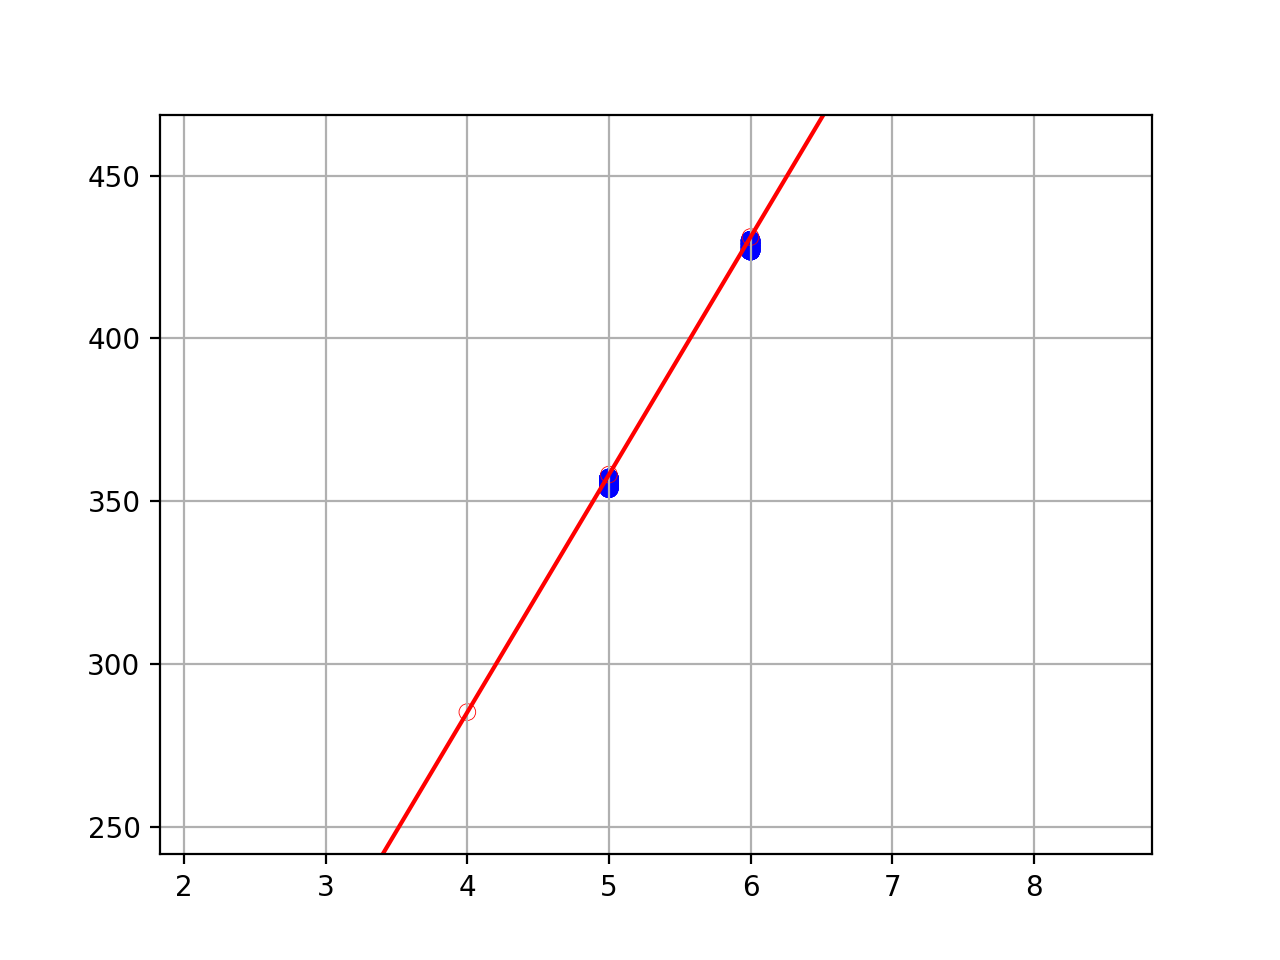

lambda iteration: -6.469902610213531 + 72.93529643089006 * iteration


In [126]:
%matplotlib notebook
dat_plot = list(filter(lambda p: p['total'] > 1 and p['success_rate'] > .95, data_perfect))
b, m = make_plot(dat_plot, False, True)
print(f'lambda iteration: {b} + {m} * iteration')

<IPython.core.display.Javascript object>


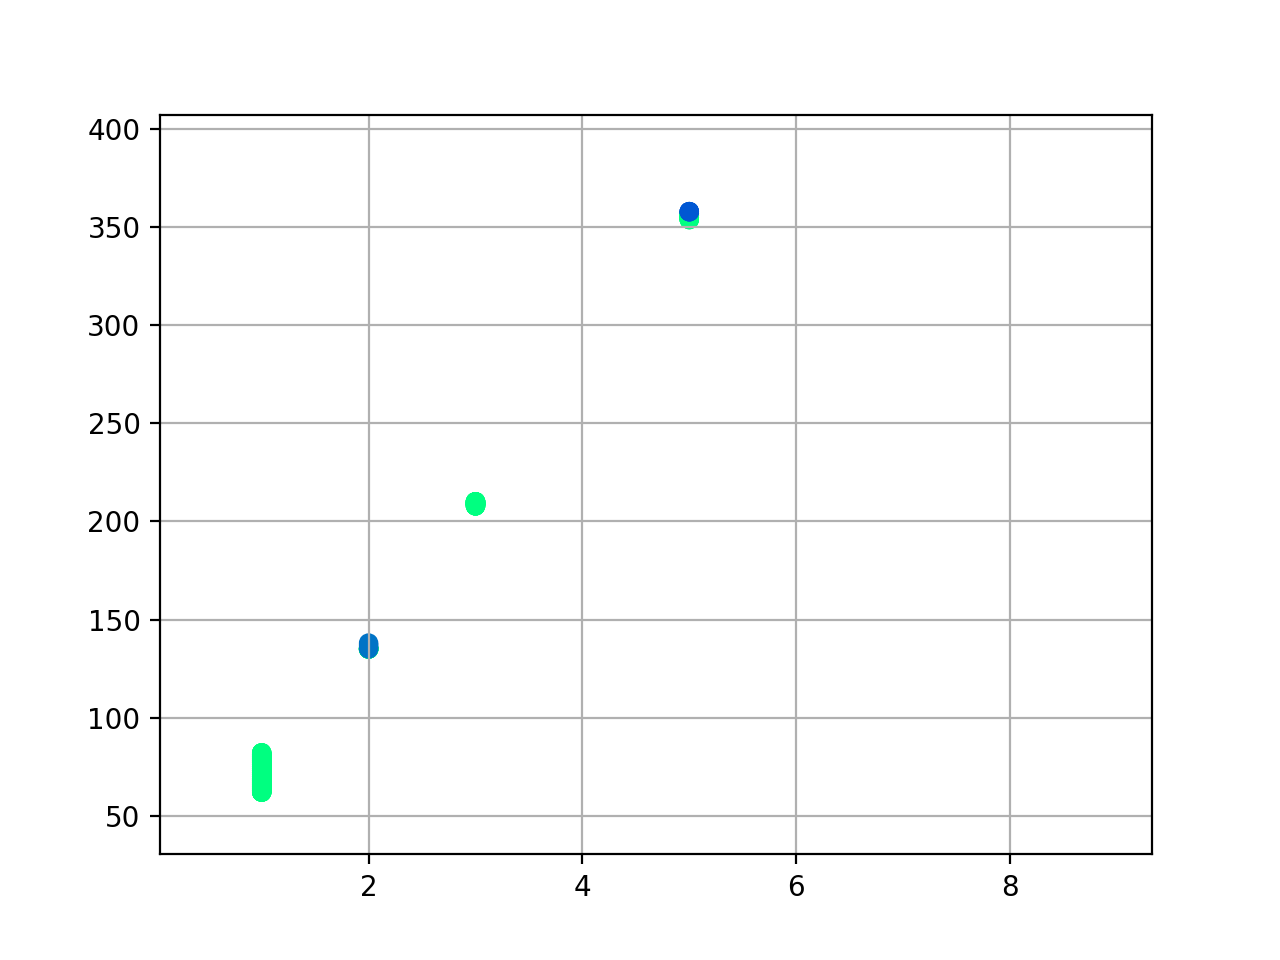

In [124]:
%matplotlib notebook
dat_plot = list(filter(lambda p: p['total'] > 1, data_perfect))
make_plot(dat_plot)

<IPython.core.display.Javascript object>


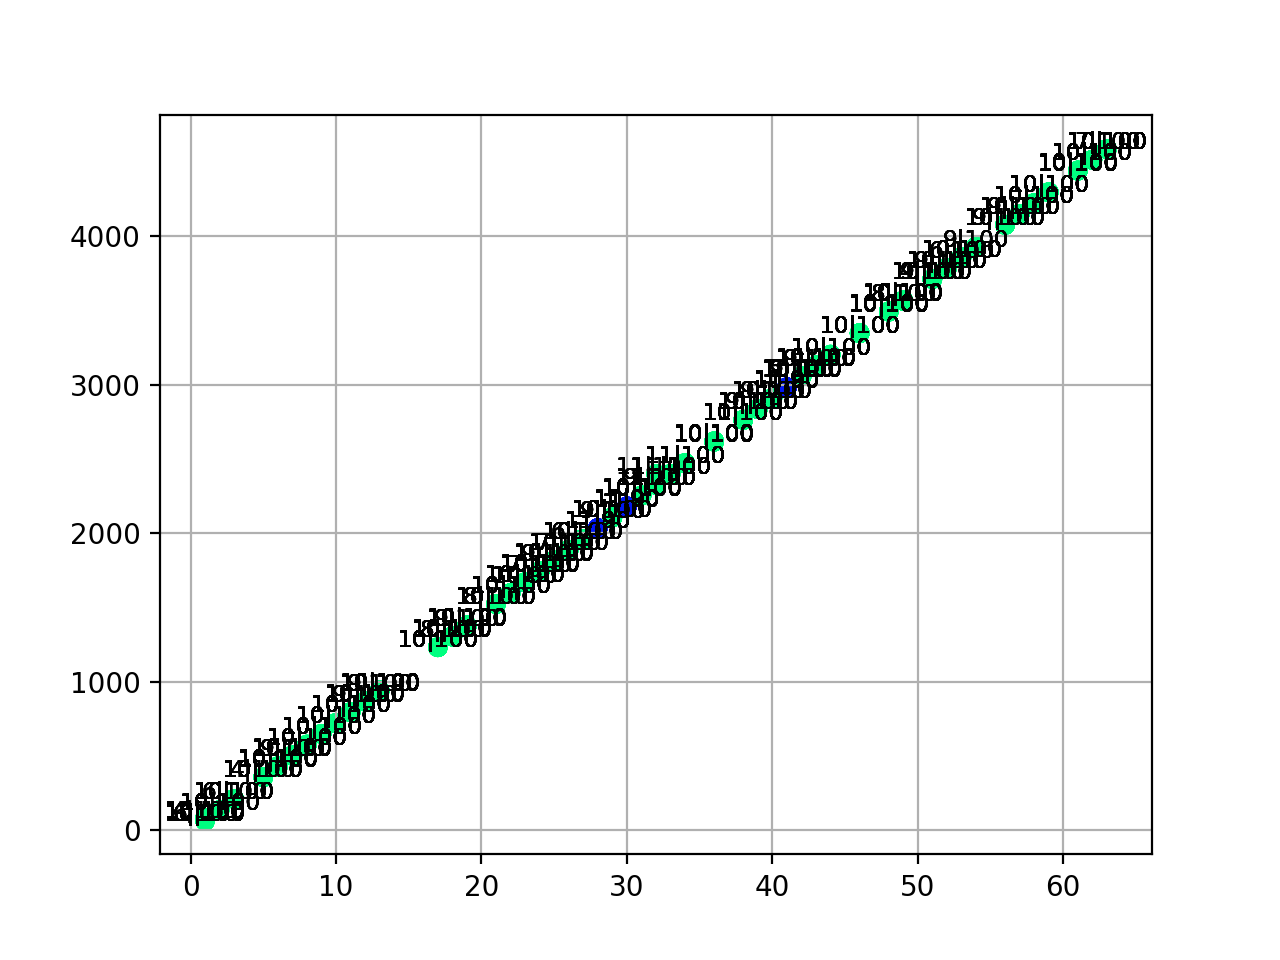

In [13]:
%matplotlib notebook
dat_noice = list(filter(lambda p: p['total'] > 2 and p['success_rate'] >= .9, data_perfect))
make_plot(dat_noice, True)

In [125]:
iters_to_check = [4, 5, 14, 17, 20, 22, 24, 30, 31, 32, 34, 35, 37, 43, 45, 52, 55, 57, 58, 59, 60, 61, 63, ]
params = []
ext_offsets = []
for p in dat_noice:
    if p['iteration'] in iters_to_check:
        params.append(p['params'])
        ext_offsets.append(p['params'][0])
ext_offsets = list(set(ext_offsets))
print(ext_offsets)

[4224, 4225, 4226, 2179, 2180, 2181, 2182, 2325, 2326, 2327, 2328, 2472, 2473, 2474, 4150, 4151, 3128, 3129, 3130, 1595, 1596, 1597, 1598, 3131, 4152, 4153, 3785, 3786, 3787, 3788, 1741, 1742, 1231, 1232, 1233, 1743, 1744, 2253, 2254, 2255, 4443, 4444, 4445, 2398, 2399, 2400, 2401, 354, 355, 356, 357, 4588, 4589, 4590, 4591, 4297, 4298, 4299, 4223]
